In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [3]:
Data_1 = pd.read_csv('/content/DataP_1.csv')
Data_2 = pd.read_csv('/content/DataP_2.csv')
Data_3 = pd.read_csv('/content/DataP_3.csv')
Data_R = pd.read_csv('/content/DataP_R.csv')
Data_1 = Data_1.dropna()
Data_2 = Data_2.dropna()
Data_3 = Data_3.dropna()
Data_R = Data_R.dropna()

In [4]:
vectorizer_2 = TfidfVectorizer()
T2 = vectorizer_2.fit_transform(Data_2['Tweet_P'])

joblib.dump(vectorizer_2, 'tfidf_vectorizer_2.pkl')

L2 = Data_2['Label']
T2_train, T2_test, L2_train, L2_test = train_test_split(T2, L2, test_size=0.2, random_state=42)
print(T2_train.shape, T2_test.shape, L2_train.shape, L2_test.shape)

(32497, 13114) (8125, 13114) (32497,) (8125,)


In [5]:
T1 = Data_1['Tweet_P']
L1 = Data_1['Label']
T1_train, T1_test, L1_train, L1_test = train_test_split(T1, L1, test_size=0.5, random_state=42)
print(T1_train.shape, T1_test.shape, L1_train.shape, L1_test.shape)

(12391,) (12392,) (12391,) (12392,)


In [6]:
T3 = Data_3['Tweet_P']
L3 = Data_3['Label']
T3_train, T3_test, L3_train, L3_test = train_test_split(T3, L3, test_size=0.5, random_state=42)
print(T3_train.shape, T3_test.shape, L3_train.shape, L3_test.shape)

(6953,) (6954,) (6953,) (6954,)


In [7]:
TR = Data_R['Tweet_P']
LR = Data_R['Label']
TR_train, TR_test, LR_train, LR_test = train_test_split(TR, LR, test_size=0.5, random_state=42)
print(TR_train.shape, TR_test.shape, LR_train.shape, LR_test.shape)

(15977,) (15977,) (15977,) (15977,)


In [8]:
#Logistic Regression Model
model_2 = LogisticRegression()
model_2.fit(T2_train, L2_train)

LogisticRegression()

In [9]:
joblib.dump(model_2, 'logistic_regression_model_2.pkl')
model_2 = joblib.load('logistic_regression_model_2.pkl')

In [10]:
files.download('tfidf_vectorizer_2.pkl')
files.download('logistic_regression_model_2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#Model trained on Data Source 2 & Tested on Data Source 2

In [12]:
L2_predicted = model_2.predict(T2_test)
print("Model trained on Data Source 2 & Tested on Data Source 2")
print("Accuracy Score 1: \n", accuracy_score(L2_test, L2_predicted))
print("Confusion Matrix: \n", confusion_matrix(L2_test, L2_predicted))
print("Classification Report: \n", classification_report(L2_test, L2_predicted))

Model trained on Data Source 2 & Tested on Data Source 2
Accuracy Score 1: 
 0.7357538461538462
Confusion Matrix: 
 [[2516 1208]
 [ 939 3462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70      3724
           1       0.74      0.79      0.76      4401

    accuracy                           0.74      8125
   macro avg       0.73      0.73      0.73      8125
weighted avg       0.74      0.74      0.73      8125



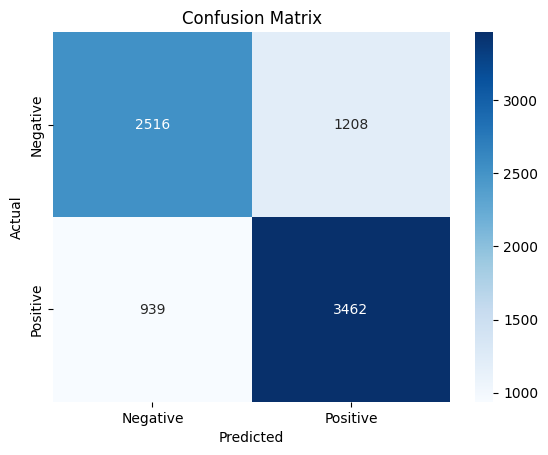

In [13]:
sns.heatmap(confusion_matrix(L2_test, L2_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
#Model trained on Data Source 2 & Tested on Data Source 1

In [15]:
vectorizer_2 = joblib.load('tfidf_vectorizer_2.pkl')
T1_test = vectorizer_2.transform(T1_test)
model_2 = joblib.load('logistic_regression_model_2.pkl')
L1_predicted = model_2.predict(T1_test)
print("Model trained on Data Source 2 & Tested on Data Source 1")
print("Accuracy Score 1: \n", accuracy_score(L1_test, L1_predicted))
print("Confusion Matrix: \n", confusion_matrix(L1_test, L1_predicted))
print("Classification Report: \n", classification_report(L1_test, L1_predicted))

Model trained on Data Source 2 & Tested on Data Source 1
Accuracy Score 1: 
 0.5956262104583603
Confusion Matrix: 
 [[1000 1091]
 [3920 6381]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.20      0.48      0.29      2091
           1       0.85      0.62      0.72     10301

    accuracy                           0.60     12392
   macro avg       0.53      0.55      0.50     12392
weighted avg       0.74      0.60      0.65     12392



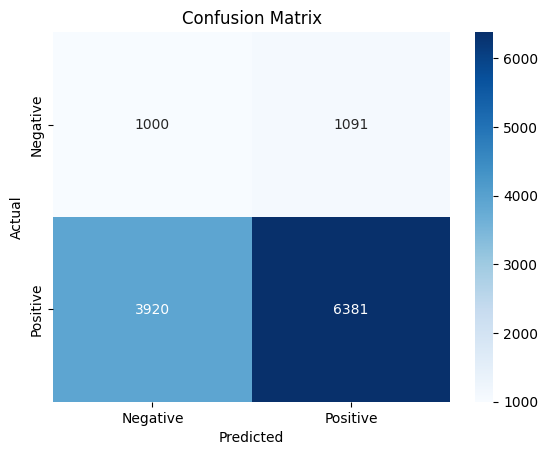

In [16]:
sns.heatmap(confusion_matrix(L1_test, L1_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#Model trained on Data Source 2 & Tested on Data Source 3

In [18]:
vectorizer_2 = joblib.load('tfidf_vectorizer_2.pkl')
T3_test = vectorizer_2.transform(T3_test)
model_2 = joblib.load('logistic_regression_model_2.pkl')
L3_predicted = model_2.predict(T3_test)
print("Model trained on Data Source 2 & Tested on Data Source 3")
print("Accuracy Score 1: \n", accuracy_score(L3_test, L3_predicted))
print("Confusion Matrix: \n", confusion_matrix(L3_test, L3_predicted))
print("Classification Report: \n", classification_report(L3_test, L3_predicted))

Model trained on Data Source 2 & Tested on Data Source 3
Accuracy Score 1: 
 0.5373885533505895
Confusion Matrix: 
 [[1951 1516]
 [1701 1786]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.56      0.55      3467
           1       0.54      0.51      0.53      3487

    accuracy                           0.54      6954
   macro avg       0.54      0.54      0.54      6954
weighted avg       0.54      0.54      0.54      6954



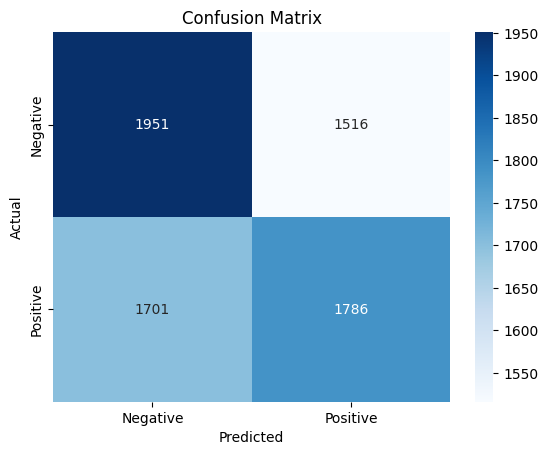

In [19]:
sns.heatmap(confusion_matrix(L3_test, L3_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#Model trained on Data Source 2 & Tested on Data Source R

In [21]:
vectorizer_2 = joblib.load('tfidf_vectorizer_2.pkl')
TR_test = vectorizer_2.transform(TR_test)
model_2 = joblib.load('logistic_regression_model_2.pkl')
LR_predicted = model_2.predict(TR_test)
print("Model trained on Data Source 2 & Tested on Data Source R")
print("Accuracy Score 1: \n", accuracy_score(LR_test, LR_predicted))
print("Confusion Matrix: \n", confusion_matrix(LR_test, LR_predicted))
print("Classification Report: \n", classification_report(LR_test, LR_predicted))

Model trained on Data Source 2 & Tested on Data Source R
Accuracy Score 1: 
 0.8027789948050322
Confusion Matrix: 
 [[12551  2338]
 [  813   275]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     14889
           1       0.11      0.25      0.15      1088

    accuracy                           0.80     15977
   macro avg       0.52      0.55      0.52     15977
weighted avg       0.88      0.80      0.84     15977



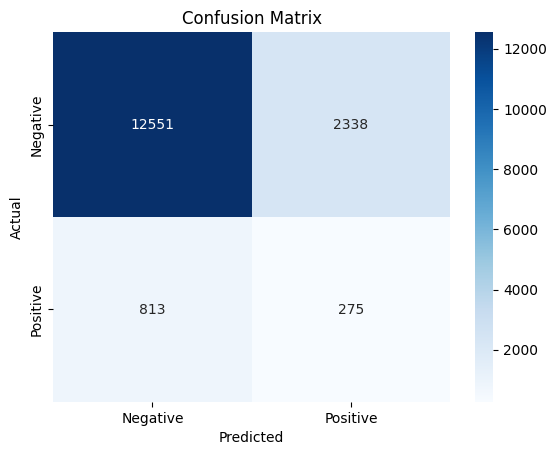

In [22]:
sns.heatmap(confusion_matrix(LR_test, LR_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()